In [1]:
import cv2
import math
import numpy as np
import sys
from matplotlib import pyplot as plt


In [8]:

def apply_mask(matrix, mask, fill_value):
    masked = np.ma.array(matrix, mask=mask, fill_value=fill_value)
    return masked.filled()

def apply_threshold(matrix, low_value, high_value):
    low_mask = matrix < low_value
    matrix = apply_mask(matrix, low_mask, low_value)

    high_mask = matrix > high_value
    matrix = apply_mask(matrix, high_mask, high_value)

    return matrix

def simplest_cb(img, percent):
    #kiem tra anh mau
    assert img.shape[2] == 3
    assert percent > 0 and percent < 100

    half_percent = percent / 200.0

    #tach anh ra cac he mau rgb
    channels = cv2.split(img)

    out_channels = []
    for channel in channels:
        assert len(channel.shape) == 2
        #tim gia tri cao va thap nhat cua pixel mau trong anh dua vao percent
        height, width = channel.shape
        vec_size = width * height
        flat = channel.reshape(vec_size)

        assert len(flat.shape) == 1
        flat = np.sort(flat)

        n_cols = flat.shape[0]

        low_val  = flat[math.floor(n_cols * half_percent)]
        high_val = flat[math.ceil( n_cols * (1.0 - half_percent))]

        print("Lowval: ", low_val)
        print("Highval: ", high_val)

        #apply cac gia tri vua tim duoc 
        thresholded = apply_threshold(channel, low_val, high_val)
        # chuan hoa lai cac ma tran theo he mau
        normalized = cv2.normalize(thresholded, thresholded.copy(), 0, 255, cv2.NORM_MINMAX)
        out_channels.append(normalized)
#gop hinh anh
    return cv2.merge(out_channels)

#Dieu chinh kich thuoc hinh anh(co hay khong deu ok)git
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

if __name__ == '__main__':
    img = cv2.imread(r"C:\Users\ADMIN\OneDrive\picture\DSCN5058.JPG")
    out = simplest_cb(img, 7)
    img1=ResizeWithAspectRatio(img,400,300)
    out1=ResizeWithAspectRatio(out,400,300)
    cv2.imshow("before", img)
    cv2.imshow("after", out)
    cv2.waitKey(0)

Lowval:  34
Highval:  223
Lowval:  31
Highval:  243
Lowval:  34
Highval:  239


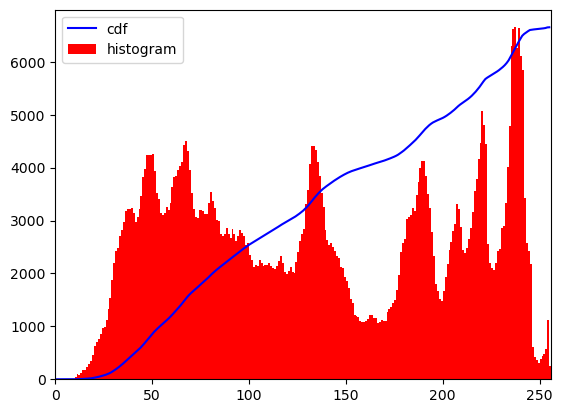

In [9]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [14]:
img2=cv2.blur(img, (5,5))
cv2.imshow('blur',img2)
cv2.waitKey(0)


111